In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def reward_rules(position, action, terminal, states):
    if position in terminal:
        return position, 0
    new_position = np.array(position) + np.array(action)
    n_p = new_position.tolist()
    if n_p not in states:
        return position, 0
    else:
        return new_position, -1

def policy_evaluation(ValueFunction, states, actions, gamma, theta):
    while True:
        v = np.copy(ValueFunction)
        delta = []
        for s in states:
            update = 0
            for a in actions:
                new_position, r = reward_rules(s, a, terminal, states)
                update += (1/len(actions))*(r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            delta.append(np.abs(v[s[0], s[1]]- update))
            v[s[0], s[1]] = update
        ValueFunction = v
        if np.all(delta < theta):
            return ValueFunction

In [69]:
gamma = 0.8
gridSize = 4
terminal = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
theta = np.repeat(0.001, 16)
V = np.zeros((gridSize, gridSize))

nV = policy_evaluation(V, states, actions, gamma, theta)
nV

array([[ 0.        , -2.64738823, -3.2887737 , -3.02471331],
       [-2.64738823, -3.55283409, -3.7360382 , -3.2887737 ],
       [-3.2887737 , -3.7360382 , -3.55283409, -2.64738823],
       [-3.02471331, -3.2887737 , -2.64738823,  0.        ]])

In [4]:
def random_policy(states, actions):
    policy = {} 
    for s in states:
        rand_action = np.random.choice(len(actions))
        policy['{}'.format(s)] = actions[rand_action]
    return policy

In [65]:
def available_actions(state, actions, gridSize):
    a = actions.copy()
    if state[0] == 0:
        a.remove([-1,0])
    if state[0] == gridSize-1:
        a.remove([1,0])
    if state[1] == 0:
        a.remove([0,-1])
    if state[1] == gridSize-1:
        a.remove([0,1])
    #print(state, a)
    return a

In [50]:
def policy_improvement(states, policy, actions, terminal, ValueFunction):
    stable = np.repeat(True, len(states))
    i = 0
    for s in states:
        old_action = policy['{}'.format(s)]
        action_pool = available_actions(s, actions, gridSize)
        if s in terminal:
            max_a = [0,0]
        else:
            max_a = action_pool[0]
        max_pos, max_r = reward_rules(s, max_a, terminal, states)
        max_action = (max_r+(gamma*ValueFunction[max_pos[0], max_pos[1]]))
        
        for a in action_pool:#actions:
            new_position, r = reward_rules(s, a, terminal, states)           
            value_action = (r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            if np.all(max_action < value_action):
                max_a = a
        policy['{}'.format(s)] = max_a
        if np.any(old_action != policy['{}'.format(s)]):
            stable[i] = False
        i += 1
    return policy, stable 

In [51]:
def policy_iteration(gridSize, states, actions, gamma, theta, terminal):
    V = np.zeros((gridSize, gridSize))
    policy = random_policy(states, actions)
    stable = np.repeat(False, len(states))
    while True:
        V = policy_evaluation(V, states, actions, gamma, theta)
        p , stable= policy_improvement(states, policy, actions, terminal, V)
        if np.all(stable):
            break
        else: policy = p
    return p, V

In [70]:
p, v = policy_iteration(gridSize, states, actions, gamma, theta, terminal)
p

{'[0, 0]': [0, 0],
 '[0, 1]': [0, -1],
 '[0, 2]': [0, -1],
 '[0, 3]': [1, 0],
 '[1, 0]': [-1, 0],
 '[1, 1]': [-1, 0],
 '[1, 2]': [-1, 0],
 '[1, 3]': [1, 0],
 '[2, 0]': [-1, 0],
 '[2, 1]': [0, -1],
 '[2, 2]': [0, 1],
 '[2, 3]': [1, 0],
 '[3, 0]': [-1, 0],
 '[3, 1]': [0, -1],
 '[3, 2]': [0, -1],
 '[3, 3]': [0, 0]}

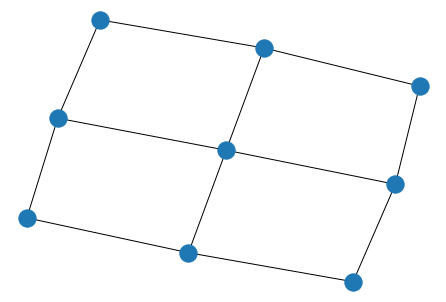

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [97]:
g = nx.Graph()

g.add_nodes_from(range(9))

g.add_edges_from([(0,1), (1,2), (0,3), (3,4), (1,4), (4,5), (2,5), (3,6), (6,7), (4,7), (7,8), (5,8)])
nx.draw(g)
plt.show()

list(g.nodes)